In [ ]:
pip install akshare

In [5]:
pip install tushare

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 6.2 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import akshare as ak
import tushare as ts
from datetime import datetime

In [2]:
stock_600519 = ak.stock_zh_a_hist(
    symbol='600519',
    period='daily',
    start_date="20160101",
    end_date='20230701',
    adjust='hfq'
)
stock_600519

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2016-01-04,600519,1204.89,1164.79,1204.89,1164.64,17350,3.719098e+08,3.34,-3.40,-41.05,0.14
1,2016-01-05,600519,1164.69,1178.86,1184.64,1152.18,31909,6.725963e+08,2.79,1.21,14.07,0.25
2,2016-01-06,600519,1178.66,1175.65,1183.08,1161.17,23761,5.024836e+08,1.86,-0.27,-3.21,0.19
3,2016-01-07,600519,1159.62,1125.65,1159.62,1114.59,8149,1.678299e+08,3.83,-4.25,-50.00,0.06
4,2016-01-08,600519,1135.40,1137.71,1154.64,1114.44,44510,9.118128e+08,3.57,1.07,12.06,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...
1816,2023-06-26,600519,9347.61,9291.78,9397.31,9221.44,23993,4.098620e+09,1.87,-1.43,-134.82,0.19
1817,2023-06-27,600519,9296.76,9302.09,9345.55,9247.01,15174,2.598139e+09,1.06,0.11,10.31,0.12
1818,2023-06-28,600519,9312.79,9389.17,9417.40,9301.83,18574,3.199294e+09,1.24,0.94,87.08,0.15
1819,2023-06-29,600519,9402.33,9315.45,9422.38,9311.93,14231,2.446524e+09,1.18,-0.79,-73.72,0.11


1. **振幅**：振幅 = \((最高价 - 最低价) / 昨日收盘价 \times 100\%\)
   
2. **涨跌幅**：涨跌幅 = \((收盘价 - 昨日收盘价) / 昨日收盘价 \times 100\%\)

3. **换手率**：换手率 = \((成交量 / 流通股本) \times 100\%\)

In [3]:
# 检查数据：1、是否有缺失，2、是否有异常
stock_600519.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      1821 non-null   object 
 1   股票代码    1821 non-null   object 
 2   开盘      1821 non-null   float64
 3   收盘      1821 non-null   float64
 4   最高      1821 non-null   float64
 5   最低      1821 non-null   float64
 6   成交量     1821 non-null   int64  
 7   成交额     1821 non-null   float64
 8   振幅      1821 non-null   float64
 9   涨跌幅     1821 non-null   float64
 10  涨跌额     1821 non-null   float64
 11  换手率     1821 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 170.8+ KB


In [4]:
# index变成datatime
stock_600519.set_index(stock_600519['日期'],inplace=True)
stock_600519.drop(['日期'],axis=1,inplace=True)

In [5]:
stock_600519
# 如果含有缺失值（开盘、最高、最低、收盘），可以在日期升序的情况下使用df.fillna(method='ffill')

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2016-01-04,600519,1204.89,1164.79,1204.89,1164.64,17350,3.719098e+08,3.34,-3.40,-41.05,0.14
2016-01-05,600519,1164.69,1178.86,1184.64,1152.18,31909,6.725963e+08,2.79,1.21,14.07,0.25
2016-01-06,600519,1178.66,1175.65,1183.08,1161.17,23761,5.024836e+08,1.86,-0.27,-3.21,0.19
2016-01-07,600519,1159.62,1125.65,1159.62,1114.59,8149,1.678299e+08,3.83,-4.25,-50.00,0.06
2016-01-08,600519,1135.40,1137.71,1154.64,1114.44,44510,9.118128e+08,3.57,1.07,12.06,0.35
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,600519,9347.61,9291.78,9397.31,9221.44,23993,4.098620e+09,1.87,-1.43,-134.82,0.19
2023-06-27,600519,9296.76,9302.09,9345.55,9247.01,15174,2.598139e+09,1.06,0.11,10.31,0.12
2023-06-28,600519,9312.79,9389.17,9417.40,9301.83,18574,3.199294e+09,1.24,0.94,87.08,0.15


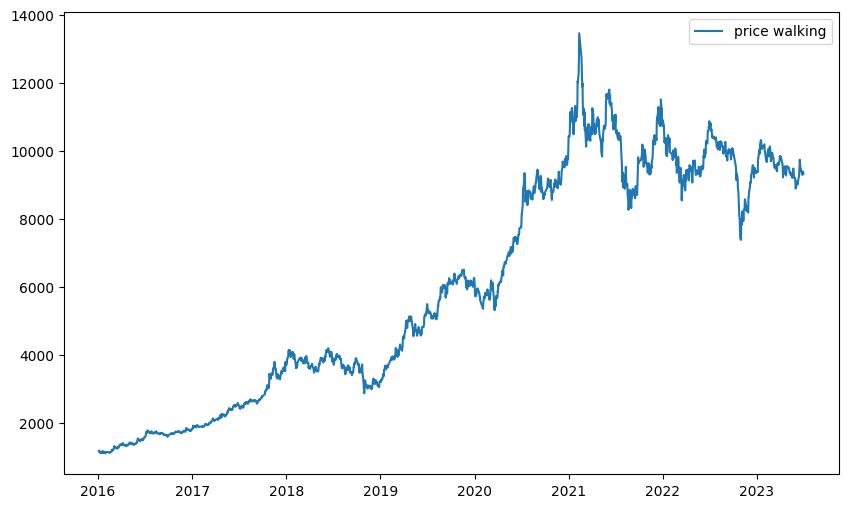

In [6]:
# 可视化看一下走势
plt.figure(figsize=(10,6))
plt.plot(stock_600519.index, stock_600519['收盘'],label='price walking')
plt.legend()

以下是关于股票配股、分拆、合并和发放股息的简单介绍及其对股票的影响：

### 1. 配股
配股是公司向现有股东以优惠价格发行新股的一种行为，通常是为了筹集资金。配股可以增加公司的股本，但同时会稀释每股的价值。

**对股票的影响**：
- **股价通常会下跌**：由于股东持有的股份数量增加，原有股份被稀释，因此每股的价值会降低。
- **投资者需额外投资**：股东可以选择是否购买配股份额，不参与配股可能会导致持股比例下降。

### 2. 股票分拆（拆股）
股票分拆是公司通过增加流通股数量并相应降低股价来提高股票的流动性。例如，将每股1股拆成2股或更多股，这样每股的价格会降低，便于投资者购买。

**对股票的影响**：
- **股价降低**：拆股后，每股的市场价格会按比例下降，但公司的总市值保持不变。
- **流动性增加**：拆股通常让股票变得更容易交易，有助于吸引更多投资者，特别是小额投资者。
- **不改变股东权益**：股东持有的股份数量增加，但持股比例和总市值不变。

### 3. 股票合并（反向分拆）
股票合并是指将多股合并成一股，减少流通股数量，提高每股股价。通常在公司股价过低时进行，以提高公司在资本市场的形象，避免被除牌风险。

**对股票的影响**：
- **股价上升**：每股的价格会按比例上升，但公司的总市值保持不变。
- **流动性降低**：合并股票可能减少交易量，因为股价变高后，交易的灵活性降低。
- **股东权益不变**：股东持有的总市值保持不变，但持股数量减少。

### 4. 发放股息
公司将部分利润分配给股东，这就是股息发放。股息可以是现金股息，也可以是股票股息。股息的发放向市场传递了公司财务健康的信息，通常会对股价产生积极影响。

**对股票的影响**：
- **股价短期下跌**：在除息日，股价会按股息金额进行调整，因此除息日后股价可能会出现短期下跌。
- **投资者的信心提升**：稳定的股息通常表明公司财务健康，能够带来更高的投资者信任度，长期利好股价。
- **现金流增加**：股东收到股息后，获得实际的回报，尤其对长期投资者有吸引力。

这四种操作会影响股价，但并不会直接改变公司的总市值（除配股外），对公司长期价值的影响还需结合公司经营情况等因素综合考虑。

除息是指股票在发放股息后，股价在除息日进行相应调整的过程。除息通常是由于公司发放股息而导致的股价下跌，以反映股息支付给股东后的股价变化。以下是除息的计算方法以及相关信息：

### 1. 除息日和除息价
- **除息日**：在除息日购买股票的投资者将不再享有本次股息的权利，只有在除息日前（含除息日）持有股票的股东才能获得股息。
- **除息价**：除息价是指在除息日当天股票的开盘参考价，一般是将股息金额从前一个交易日的收盘价中扣除后的价格。

### 2. 计算除息价
**除息价计算公式**：

- 现金股息除息：  
  \[
  除息价 = 前一交易日收盘价 - 每股派息金额
  \]

例如，如果某公司股票的前一交易日收盘价为 10 元，每股派发现金股息 0.5 元，则除息价为：

\[
除息价 = 10 - 0.5 = 9.5 \text{ 元}
\]

### 3. 除息的影响
- **股价短期下跌**：由于股息已经支付给了股东，公司市值因此减少，因此股价会按股息金额进行下调。
- **股东总资产不变**：对于持有股票的股东，尽管股价下跌，但因收到股息，其总资产不会受太大影响。
- **市场情绪波动**：除息后股价下跌是正常现象，不应误认为是公司基本面的变动。

### 4. 实际操作
在实际投资中，股东不需要手动进行除息操作。证券交易系统会在除息日自动将股价调整为除息价，投资者的持仓股数不变，但持有的股票市值会因为除息而下降，账户中会显示收到的股息（通常是现金）。

### 5. 股票股息的除息（除权除息）
如果公司发放的是股票股息（即向股东增发股票），则除息价计算会有所不同，需要考虑到新发行的股票数量，除息的同时也称为“除权”。

### 6. 前复权和后复权
https://zhuanlan.zhihu.com/p/150009748
#### 前复权
保持当前价格不变，将历史价格进行增减，从而使股价连续。 前复权用来看盘非常方便，能一眼看出股价的历史走势，叠加各种技术指标也比较顺畅，是各种行情软件默认的复权方式。
缺点一：会导致在不同时点看到的历史前复权价可能出现差异。
缺点二：对于有持续分红的公司来说，前复权价可能出现负值。
#### 后复权
后复权：保证历史价格不变，在每次股票权益事件发生后，调整当前的股票价格。
后复权价格和真实股票价格可能差别较大，不适合用来看盘。
优点在于可以被看作投资者的长期财富增长曲线，反映投资者的真实收益率情况。

一般情况下，看盘用前复权，研究用后复权

In [8]:
pro = ts.pro_api("37c8e0759df1777b1d65cf311eb52bf9b5864b4e9a59d0513bc1462d")
df_600519 = pro.daily(ts_code='600519.SH',start_date='20230101',end_date='20230701')
df_600519
# change：close-pre_close，今天收盘价-昨天收盘价
# pct_chg：change/pre_close*100，反映涨跌幅
# vol：交易量，以手为单位，一手100股
# amount：成交金额，以元为单位

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600519.SH,20230630,1700.00,1708.99,1686.48,1691.00,1687.80,3.20,0.1896,20458.69,3472586.730
1,600519.SH,20230629,1731.00,1734.99,1713.01,1713.71,1728.38,-14.67,-0.8488,14231.16,2446524.134
2,600519.SH,20230628,1713.18,1734.00,1711.00,1728.38,1711.05,17.33,1.0128,18573.56,3199294.221
3,600519.SH,20230627,1709.99,1719.70,1700.09,1711.05,1709.00,2.05,0.1200,15174.46,2598138.744
4,600519.SH,20230626,1720.11,1730.00,1695.00,1709.00,1735.83,-26.83,-1.5457,23992.68,4098619.510
...,...,...,...,...,...,...,...,...,...,...,...
113,600519.SH,20230109,1835.00,1849.98,1807.82,1841.20,1803.77,37.43,2.0751,30977.23,5684181.147
114,600519.SH,20230106,1806.12,1811.90,1787.00,1803.77,1801.00,2.77,0.1538,24903.75,4480838.898
115,600519.SH,20230105,1737.00,1801.00,1733.00,1801.00,1725.01,75.99,4.4052,47942.85,8541587.089
116,600519.SH,20230104,1730.00,1738.70,1716.00,1725.01,1730.01,-5.00,-0.2890,20415.75,3523582.306


In [59]:
# 循环获取多只股票
# 定义获取数据的函数举例
# ak
def get_stock_data_ak(code,start_date,end_date,period='daily',adjust='hfq'):
  '''
  code：股票代码，比如600519
  start_date：如20190101，str
  end_date：str
  period：str，{'daily','weekly','monthly'}
  adjust：str，{'qfq', 'hfq'}
  '''
  # 获取数据
  stock_try = ak.stock_zh_a_hist(symbol=code,adjust=adjust)
  first_day = stock_try.iloc[0]['日期']
  last_day = stock_try.iloc[-1]['日期']
  if datetime.strptime(start_date,"%Y%m%d").date()<first_day:
    return "起始日期过早"
  elif datetime.strptime(end_date,"%Y%m%d").date()>last_day:
    return "截止日期过晚"
  else:
    stock_data = ak.stock_zh_a_hist(
        symbol=code,
        period=period,
        start_date=start_date,
        end_date=end_date,
        adjust=adjust
    )
    stock_data.set_index(stock_data['日期'],inplace=True)
    stock_data.drop(['日期'],axis=1,inplace=True)
    return stock_data
get_stock_data_ak('600520','20160101','20231231')

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2016-01-04,600520,50.23,45.35,51.00,45.35,32467,8.554787e+07,11.22,-9.97,-5.02,2.11
2016-01-05,600520,42.13,42.92,45.57,40.83,89097,2.132752e+08,10.45,-5.36,-2.43,5.79
2016-01-06,600520,42.99,44.81,45.10,42.99,64685,1.588318e+08,4.92,4.40,1.89,4.20
2016-01-07,600520,44.29,40.35,44.29,40.35,11092,2.557007e+07,8.79,-9.95,-4.46,0.72
2016-01-08,600520,40.69,40.20,42.49,37.65,69455,1.546274e+08,12.00,-0.37,-0.15,4.51
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,600520,45.64,46.79,47.28,45.57,168903,4.340315e+08,3.75,2.52,1.15,10.66
2023-12-26,600520,46.79,49.01,50.21,46.38,381594,1.022994e+09,8.19,4.74,2.22,24.09
2023-12-27,600520,48.56,53.88,53.88,47.67,352205,1.000885e+09,12.67,9.94,4.87,22.23


In [83]:
# 获取所需要的股票数据
def get_set_stock(stocks,start_date='20230101',end_date='20230911',period='daily',adjust='hfq'):
  dct = {}
  for i in stocks:
    stock_data = get_stock_data_ak(i,start_date=start_date,end_date=end_date,period=period,adjust=adjust)
    dct[i] = stock_data
  return dct
get_set_stock(['600519','600520'])

{'600519':               股票代码        开盘        收盘        最高        最低    成交量  \
 日期                                                                  
 2023-01-03  600519   9403.34   9397.36   9439.66   9276.76  26034   
 2023-01-04  600519   9397.31   9372.23   9441.02   9326.96  20416   
 2023-01-05  600519   9432.48   9754.07   9754.07   9412.38  47943   
 2023-01-06  600519   9779.79   9767.98   9808.84   9683.72  24904   
 2023-01-09  600519   9924.91   9956.06  10000.18   9788.33  30977   
 ...            ...       ...       ...       ...       ...    ...   
 2023-09-05  600519  10220.92  10174.19  10220.92  10164.65  15659   
 2023-09-06  600519  10170.68  10185.75  10214.19  10125.50  11121   
 2023-09-07  600519  10143.54  10070.18  10165.10  10035.96  16982   
 2023-09-08  600519  10054.80   9972.20  10054.80   9954.36  12212   
 2023-09-11  600519   9919.44   9990.64  10080.23   9919.44  15926   
 
                      成交额    振幅   涨跌幅     涨跌额   换手率  
 日期                     